In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Weather Dataset 

In [ ]:
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal','High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True','False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No','Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [ ]:
data = {
    "Outlook": Outlook,
    "Temperature": Temperature,
    "Humidity": Humidity,
    "Wind": Wind,
    "Play": Play
}
df = pd.DataFrame(data)
df.head()

,Outlook,Temperature,Humidity,Wind,Play
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [ ]:
# create the label encoder
encoder = LabelEncoder()

df["Outlook"] = encoder.fit_transform(df["Outlook"])

df["Temperature"] = encoder.fit_transform(df["Temperature"])
df["Humidity"] = encoder.fit_transform(df["Humidity"])
df["Wind"] = encoder.fit_transform(df["Wind"])
df["Play"] = encoder.fit_transform(df["Play"])

df.head()

,Outlook,Temperature,Humidity,Wind,Play
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1


In [ ]:
X = df.drop(["Play"], axis=1)
y = df["Play"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
model = DecisionTreeClassifier(criterion = "entropy",max_depth=6)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
comparison = pd.DataFrame(
    {
        "Predictions": predictions,
        "Data": y_test
    }
)
comparison
cf = confusion_matrix(y_test, predictions)
cf

array([[1, 0],
       [1, 3]])

In [ ]:
ps = precision_score(y_test, predictions)
ps

1.0

In [ ]:
acc = accuracy_score(y_test, predictions)
acc

0.8

In [ ]:
rs = recall_score(y_test, predictions)
rs

0.75

In [ ]:
f1_s = f1_score(y_test, predictions)
f1_s

0.8571428571428571

[Text(0.4444444444444444, 0.875, 'Humidity <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [4, 5]\nclass = No'),
 Text(0.2222222222222222, 0.625, 'Outlook <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = Yes'),
 Text(0.1111111111111111, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = No'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Yes'),
 Text(0.6666666666666666, 0.625, 'Wind <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = No'),
 Text(0.5555555555555556, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = No'),
 Text(0.7777777777777778, 0.375, 'Outlook <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Yes'),
 Text(0.6666666666666666, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = No'),
 Text(0.8888888888888888, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Yes')]

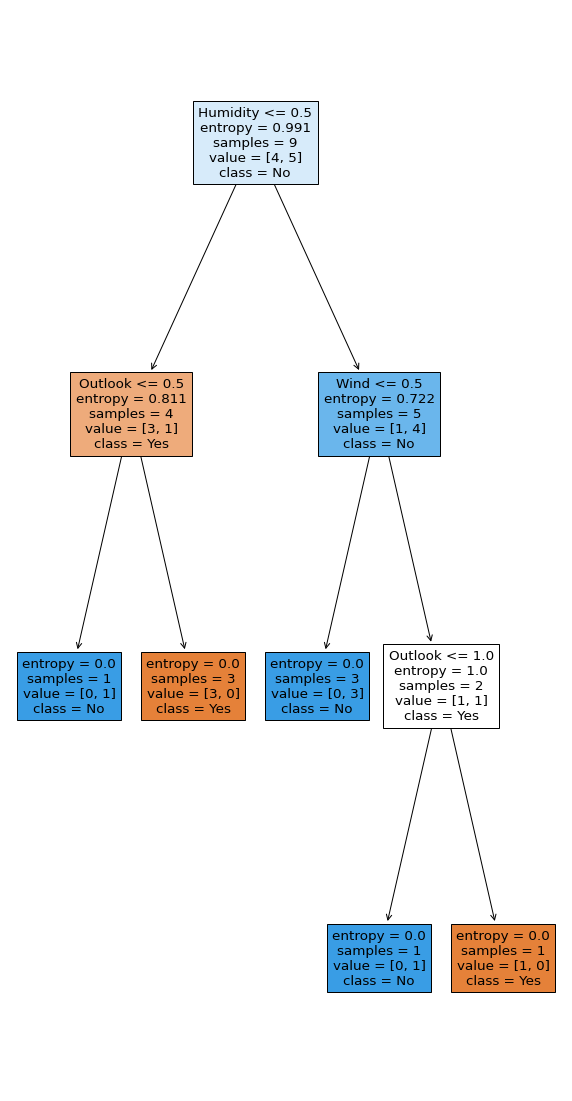

In [ ]:
plt.figure(figsize=(10,20))
plot_tree(model, feature_names=["Outlook", "Temperature", "Humidity", "Wind"], class_names=["Yes", "No"], filled=True)

One Hot Encoding

In [ ]:
encoder = OneHotEncoder()
X = encoder.fit_transform(df.drop(["Play"], axis=1))
X.toarray()

array([[0., 1., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 1., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 1., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 0., 1.]])

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.15)

[Text(0.655, 0.9444444444444444, 'X[27] <= 0.144\nentropy = 0.953\nsamples = 483\nvalue = [180, 303]\nclass = No'),
 Text(0.43, 0.8333333333333334, 'X[23] <= 874.85\nentropy = 0.453\nsamples = 326\nvalue = [31, 295]\nclass = No'),
 Text(0.3, 0.7222222222222222, 'X[27] <= 0.136\nentropy = 0.197\nsamples = 295\nvalue = [9, 286]\nclass = No'),
 Text(0.16, 0.6111111111111112, 'X[13] <= 37.99\nentropy = 0.128\nsamples = 284\nvalue = [5, 279]\nclass = No'),
 Text(0.08, 0.5, 'X[21] <= 30.145\nentropy = 0.063\nsamples = 270\nvalue = [2, 268]\nclass = No'),
 Text(0.04, 0.3888888888888889, 'entropy = 0.0\nsamples = 232\nvalue = [0, 232]\nclass = No'),
 Text(0.12, 0.3888888888888889, 'X[14] <= 0.003\nentropy = 0.297\nsamples = 38\nvalue = [2, 36]\nclass = No'),
 Text(0.08, 0.2777777777777778, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Yes'),
 Text(0.16, 0.2777777777777778, 'X[24] <= 0.141\nentropy = 0.179\nsamples = 37\nvalue = [1, 36]\nclass = No'),
 Text(0.12, 0.16666666666666666, 'en

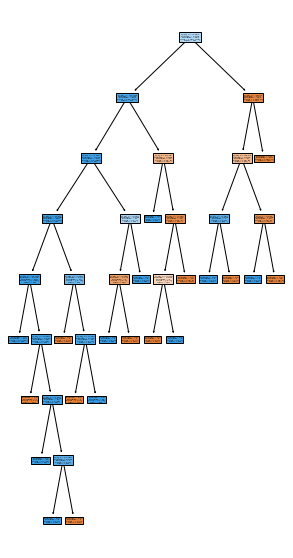

In [ ]:
model = DecisionTreeClassifier(criterion = "entropy")
Y_train.shape
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

plt.figure(figsize=(5,10))
plot_tree(model, class_names=["Yes", "No"], filled=True)

In [ ]:
precision_score(Y_test, predictions), accuracy_score(Y_test,  predictions), recall_score(Y_test,  predictions), f1_score(Y_test,  predictions)

(0.5, 0.6666666666666666, 1.0, 0.6666666666666666)

Breast Cancer Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [ ]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

precision_score(y_test, y_pred), accuracy_score(y_test,  y_pred), recall_score(y_test,  y_pred), f1_score(y_test,  y_pred)
# plt.figure(figsize=(5,10))
# plot_tree(model, class_names=["Yes", "No"], filled=True)



(0.945054945054945, 0.951048951048951, 0.9772727272727273, 0.9608938547486033)

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0023377177666550225, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.003755868544600938, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.003912363067292645, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0046603148301574086, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.006903500292689192, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.010328638497652583, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.013340022605441777, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.01839045286687659, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.03362829419977318, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.3456005427794839, random_state=0)]

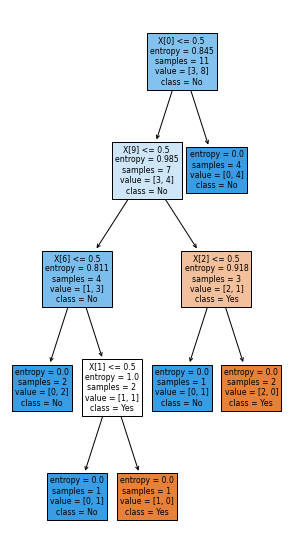

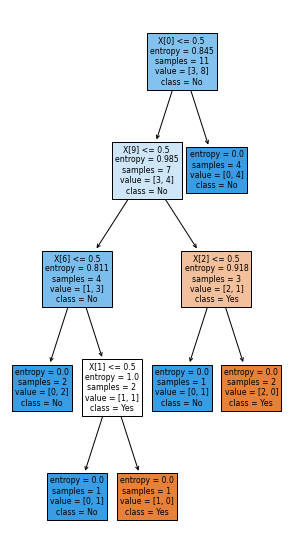

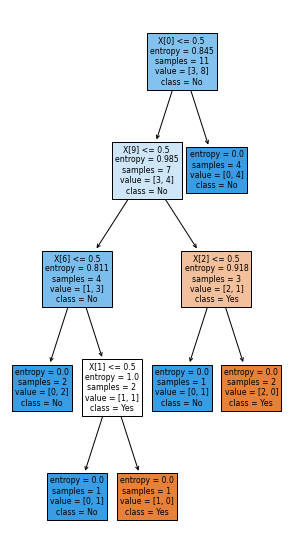

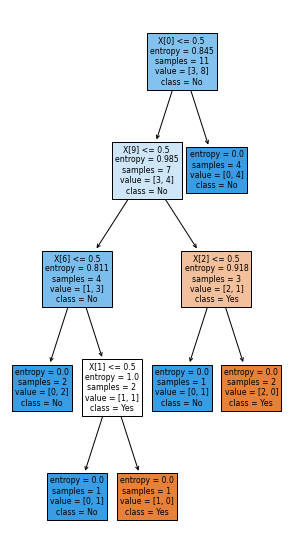

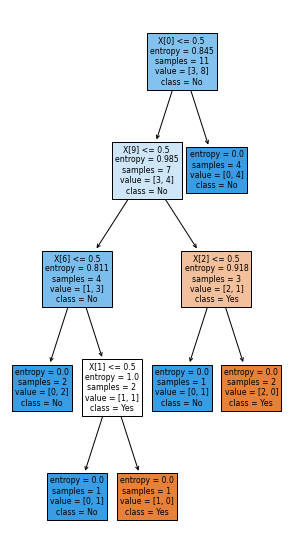

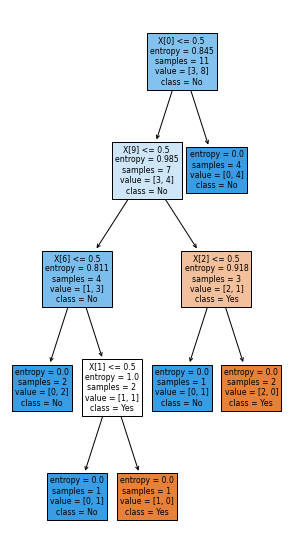

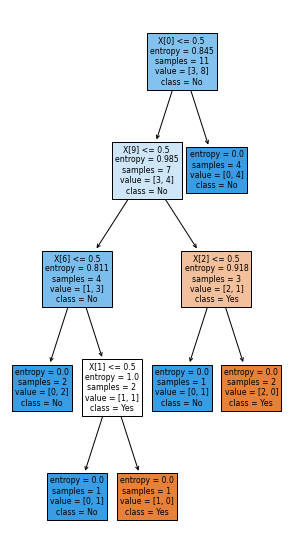

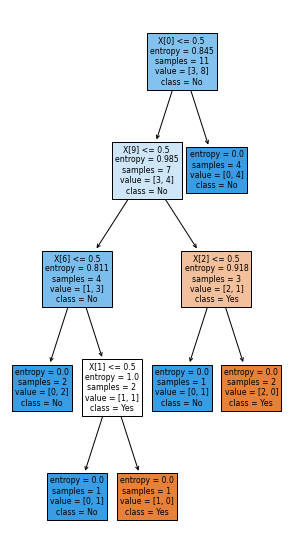

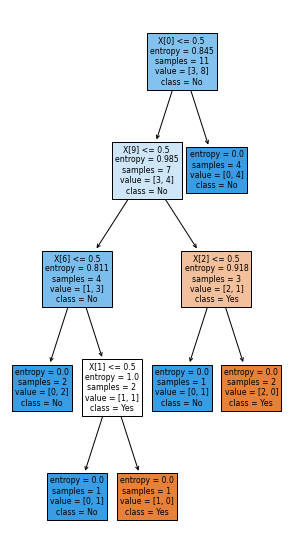

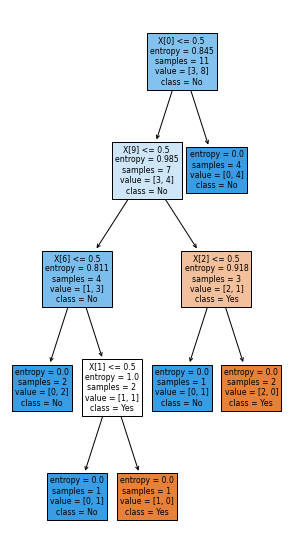

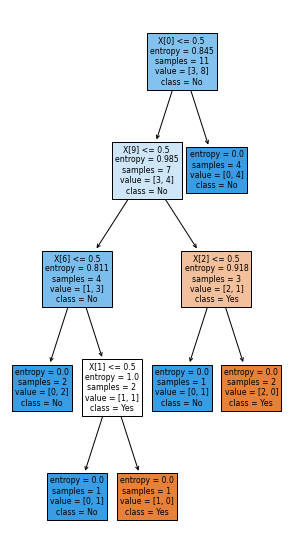

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
# print(ccp_alphas)
clfs = []
for i in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    plt.figure(figsize=(5,10))
    plot_tree(model, class_names=["Yes", "No"], filled=True)
    clf.fit(X, y)
    clfs.append(clf)
clfs

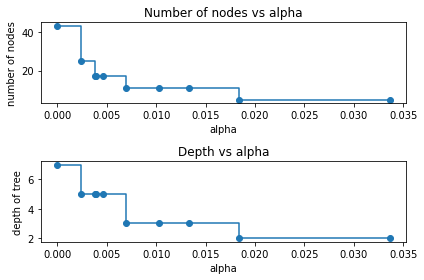

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

  Iris Dataset

In [ ]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

[Text(0.4, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.75, 'X[3] <= 1.65\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.2, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.193\nsamples = 37\nvalue = [0, 33, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3, 0.4166666666666667, 'X[0] <= 6.05\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'X[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'X[2] <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(0.7, 0.4166666666666667, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3

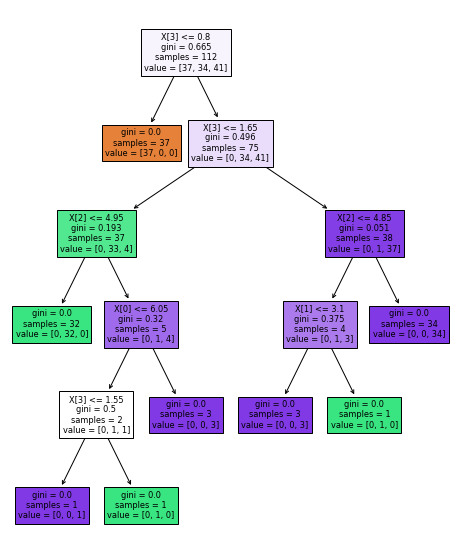

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

plt.figure(figsize=(8,10))
plot_tree(clf, filled=True)

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
# print(ccp_alphas)
clfs = []
for i in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    clf.fit(X, y)
    clfs.append(clf)
ccp_alphas

array([0.        , 0.00714286, 0.00869361, 0.04942085, 0.25081098,
       0.33279549])

Exercise 5

In [ ]:
#Iris Dataset

model_exe = DecisionTreeClassifier(random_state=104,max_leaf_nodes=104)
model_exe.fit(X_train,y_train)

y_pred = model_exe.predict(X_test)

precision_score(y_test, y_pred,average='micro'), accuracy_score(y_test,  y_pred), recall_score(y_test,  y_pred,average='micro'), f1_score(y_test,  y_pred,average='micro')

(0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158)

In [ ]:
#Exercise question 1
# What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’?

model.predict([[1,2,1,0]])[0]

ValueError: ignored

In [ ]:
#Exercise question 2
# What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’?

model.predict([[2,0,0,1]])[0]

In [ ]:
#Exercise question 6
# Train weather dataset using Decision Tree Classifier with max_depth of the tree =2.Find out accuracy, precision and recall of the trained model.

model_exe6 = DecisionTreeClassifier(random_state=104,max_depth = 2)
model_exe6.fit(X_train,Y_train)


y_pred6 = model_exe6.predict(X_test)

precision_score(Y_test, y_pred6), accuracy_score(Y_test,  y_pred6), recall_score(Y_test,  y_pred6), f1_score(Y_test,  y_pred6)

(0.9629629629629629,
 0.9534883720930233,
 0.9629629629629629,
 0.9629629629629629)